

# Problem Statment



**Sentiment Analysis**

Binary classification (positive vs negative sentiment) of movie reviews.

Techinques:

    Classical machine learning techniques (Naive Bayes, Logistic Regression)
    Deep learning techniques (Recurrent Neural Networks, Embeddings)

Learning Type:

    supervised learning - using labelled dataset
        data => model (based on patterns)
        training vs validation vs test
    unsupervised learning

Evaluation:

    accuracy - on test set (correcly predicted number / total number)
    false positives / false negatives



# Dataset

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.6 MB/s 
     |████████████████████████████████| 212 kB 62.9 MB/s 
     |████████████████████████████████| 182 kB 69.3 MB/s 
     |████████████████████████████████| 115 kB 75.0 MB/s 
     |████████████████████████████████| 127 kB 73.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from datasets import load_dataset
imdb_dataset = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
imdb_train=load_dataset("imdb",split='train[:2000]+train[20000:22000]')
print(imdb_train)
imdb_test=load_dataset("imdb",split='test[:1000]+test[20000:21000]')
print(imdb_test)

Dataset({
    features: ['text', 'label'],
    num_rows: 4000
})


Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})


# Tokenizer

- WordPiece - subword tokenizer - used by BERT and DistilBERT

In [5]:
!pip install transformers

In [6]:
from transformers import AutoTokenizer, DistilBertTokenizer

- [Auto classes](https://huggingface.co/docs/transformers/model_doc/auto?highlight=autotokenizer) in huggingface, automatically retrieve the right model (configuration, weights, vocabulary) from the name of a given checkpoint

In [7]:
model_ckpt="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [8]:
type(tokenizer)

transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast

In [9]:
sample_text = "What can I learn today about natural language processing and tokenization?"

encoded_text =tokenizer(sample_text)
encoded_text

{'input_ids': [101, 2054, 2064, 1045, 4553, 2651, 2055, 3019, 2653, 6364, 1998, 19204, 3989, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'what',
 'can',
 'i',
 'learn',
 'today',
 'about',
 'natural',
 'language',
 'processing',
 'and',
 'token',
 '##ization',
 '?',
 '[SEP]']

In [11]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] what can i learn today about natural language processing and tokenization? [SEP]'

In [12]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [13]:
tokenizer.vocab_size

30522

In [14]:
tokenizer.model_max_length

512

In [15]:
list(tokenizer.vocab.items())[50:60]

[('brothers', 3428),
 ('wavelength', 19934),
 ('denoted', 19537),
 ('abolished', 8961),
 ('##zar', 9057),
 ('chow', 20209),
 ('##bang', 25153),
 ('republican', 3951),
 ('jd', 26219),
 ('remove', 6366)]

In [16]:
tokenizer.get_vocab

<bound method PreTrainedTokenizerFast.get_vocab of PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})>

In [17]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [18]:
print(imdb_dataset['train'][10924]['text'])
print(imdb_dataset['train'][10925]['text'])

I went to see it in hopes of some good old fashioned Alice Entertainment.Once I realized I would not be getting that,I watched it for a pretty well made movie (in terms of filming,and yeah..that was it).But aside from it having a good film quality,considering I had been watching grainy movies all day long,there was nothing good about that movie.<br /><br />He killed 42.Why were Tweedle Dee and Dum played by Mudler and Scully?Serisouly,Who can answer that for me?Who can answer anything awful about this movie for me.<br /><br />I agree with whoever said it was just one big long inside joke for the staff.That's all it seemed to be.<br /><br />Poor Mr.Carroll.I'm so sorry somebody did that to his wonderful tales.
This movie is terrible but it has some good effects.


In [19]:
test_tokenization = tokenize(imdb_dataset['train'][10924:10926])
test_tokenization

{'input_ids': [[101, 1045, 2253, 2000, 2156, 2009, 1999, 8069, 1997, 2070, 2204, 2214, 13405, 5650, 4024, 1012, 2320, 1045, 3651, 1045, 2052, 2025, 2022, 2893, 2008, 1010, 1045, 3427, 2009, 2005, 1037, 3492, 2092, 2081, 3185, 1006, 1999, 3408, 1997, 7467, 1010, 1998, 3398, 1012, 1012, 2008, 2001, 2009, 1007, 1012, 2021, 4998, 2013, 2009, 2383, 1037, 2204, 2143, 3737, 1010, 6195, 1045, 2018, 2042, 3666, 8982, 2100, 5691, 2035, 2154, 2146, 1010, 2045, 2001, 2498, 2204, 2055, 2008, 3185, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 2002, 2730, 4413, 1012, 2339, 2020, 26922, 2571, 9266, 1998, 4241, 2213, 2209, 2011, 8494, 3917, 1998, 25686, 1029, 14262, 19565, 5313, 2100, 1010, 2040, 2064, 3437, 2008, 2005, 2033, 1029, 2040, 2064, 3437, 2505, 9643, 2055, 2023, 3185, 2005, 2033, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1045, 5993, 2007, 9444, 2056, 2009, 2001, 2074, 2028, 2502, 2146, 2503, 8257, 2005, 1996, 3095, 1012, 2008, 1005, 1055, 2035, 2009, 2790, 2000, 2022, 10

In [20]:
print(len(test_tokenization.input_ids[0]), len(test_tokenization.input_ids[1]))
print(len(test_tokenization.attention_mask[0]), len(test_tokenization.attention_mask[1]))
print(sum(test_tokenization.attention_mask[0]), sum(test_tokenization.attention_mask[1]))

191 191
191 191
191 13


In [21]:
def not_null(nums):
  sum = 0
  for n in nums:
    if n == 0:
      sum+=1
  return sum

In [22]:
print(not_null(test_tokenization.input_ids[0]), not_null(test_tokenization.input_ids[1]))


0 178


In [23]:
imdb_tokenized = imdb_train.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [25]:
imdb_tokenized.column_names

['text', 'label', 'input_ids', 'attention_mask']

In [26]:
imdb_train_tokenized = imdb_train.map(tokenize, batched=True, batch_size=None)
imdb_train_tokenized.column_names

['text', 'label', 'input_ids', 'attention_mask']

In [27]:
imdb_test_tokenized = imdb_test.map(tokenize, batched=True, batch_size=None)
imdb_test_tokenized.column_names

  0%|          | 0/1 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask']

# Extract hidden state - embedding - using DistilBERT

In [28]:
from transformers import AutoModel

In [29]:
import torch

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [31]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertModel

In [33]:
sample_text = "This is a sample text"
sample_tokens = tokenizer(sample_text, return_tensors='pt')
print(sample_tokens['input_ids'].size())
sample_tokens

torch.Size([1, 7])


{'input_ids': tensor([[ 101, 2023, 2003, 1037, 7099, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [34]:
sample_tokens_gpu = {k:v.to(device) for k,v in sample_tokens.items()}

In [35]:
sample_output=model(**sample_tokens_gpu)

In [36]:
sample_output.last_hidden_state.size()

torch.Size([1, 7, 768])

In [43]:
imdb_tokenized.set_format("torch", columns=['input_ids','attention_mask','label'])
imdb_train_tokenized.set_format("torch", columns=['input_ids','attention_mask','label'])
imdb_test_tokenized.set_format("torch", columns=['input_ids','attention_mask','label'])

In [38]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [47]:
def extract_hidden_state(batch):
    inputs_on_gpu = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
      last_hidden_state = model(**inputs_on_gpu).last_hidden_state
    return { 'hidden_state': last_hidden_state[:,0].cpu().numpy() }

In [48]:
imdb_train_tokenized

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 4000
})

In [44]:
imdb_train_hidden_states = imdb_train_tokenized.map(extract_hidden_state, batched=True, batch_size=100)

In [46]:
imdb_train_hidden_states

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 4000
})

In [45]:
imdb_test_hidden_states = imdb_test_tokenized.map(extract_hidden_state, batched=True, batch_size=100)

  0%|          | 0/20 [00:00<?, ?ba/s]

In [ ]:
# torch.save(imdb_hidden_states, 'imdb_hidden_states.pt')
# torch.load('imdb_hidden_states.pt')

# Create feature Matrix

In [56]:
import numpy as np

train_x = np.array(imdb_train_hidden_states['hidden_state'])
train_y = np.array(imdb_train_hidden_states['label'])
test_x = np.array(imdb_test_hidden_states['hidden_state'])
test_y =np.array(imdb_test_hidden_states['label'])
print(f'train_x : {train_x.shape}, train_y: {train_y.shape}')
print(f'test_x : {test_x.shape}, test_y: {test_y.shape}')

train_x : (4000, 768), train_y: (4000,)
test_x : (2000, 768), test_y: (2000,)


# Classification

- Hyperparameters C and max_iter - [see LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=3000, C=0.4)
lr.fit(train_x, train_y)


In [ ]:
lr.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


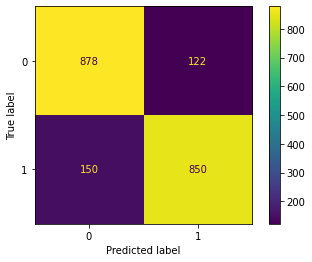

In [63]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

pred_y = lr.predict(test_x)
plot_confusion_matrix(lr, test_x, test_y)  
plt.show()

# Huggingface highlevel library - Pipeline usage examples

## Text Classification

In [98]:
from transformers import pipeline

classifier = pipeline('text-classification')
classifier

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [99]:
imdb_test[0]['text']

'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as they have

In [100]:
classifier(imdb_test[0]['text'])

[{'label': 'NEGATIVE', 'score': 0.999616265296936}]

In [102]:
def shorten(text, size=512):
  return text[:size]

shorten("asddsadasdasdasdas",3)

'asd'

In [106]:
imdb_shortened_texts = [shorten(text) for text in imdb_test['text']]

In [ ]:
res = classifier(imdb_shortened_texts)

In [ ]:
# GPU runtime
res

## Question Answering

In [ ]:
qa = pipeline("question-answering")
question = "How old is Sara?"
context = "I am living in California with my two daughters Kate and Sara. Kate is the older one with 8 year, and Sare is the younger child, with only 2. We are always on a lookout for adventure."

output = qa(question=question, context=context)

import pandas as pd
pd.Dataframe(output)

## Summarization

In [ ]:
summarizer = pipeline("summarization")
output = summarizer(context, max_lenght=20)
output[0]['summary_text']

## Text Generation

In [ ]:
generator = pipeline('text-generation')
output = generator(context, max_lenght=200)
output[0]['generated-text']